# Treinando modelos com o LDD Data

In [51]:
import os

output_dir = '../images'
os.makedirs(output_dir, exist_ok=True) 

In [52]:
# função para salvar gráficos em um diretório específico
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recuperando os dados

In [53]:
import pandas as pd

ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [54]:
def load_ldd_data(ldd_path = LDD_PATH):
  csv_path = os.path.join(ldd_path, 'LDD-dataset.csv')
  return pd.read_csv(csv_path)

### Entendendo a estrutura dos dados

In [55]:
ldd = load_ldd_data()

ldd.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Existem 14 atributos na base de dados, com colunas categóricas (Gender e Class) e numéricas. 

In [56]:
ldd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


O dataset apresenta um total de 1000 registros, sendo que todas as colunas apresentam valores, ou seja não há valores ausentes.

In [57]:
# visualizando a distribuição da variável-alvo
ldd['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [58]:
# corrigindo valores duplicados na variável-alvo
ldd['CLASS'] = ldd['CLASS'].str.upper().str.strip()

ldd['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [59]:
# visualizando a distribuição da variável Gender
ldd['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [60]:
# corrigindo os erros de formatação
ldd['Gender'] = ldd['Gender'].str.upper()

# melhorando a descrição das classes
ldd['Gender'] = ldd['Gender'].replace({'M': 'Male', 'F': 'Female'})

ldd['Gender'].value_counts()

Gender
Male      565
Female    435
Name: count, dtype: int64

In [61]:
# removendo colunas desnecessárias
ldd = ldd.drop(columns=['ID', 'No_Pation'])

In [62]:
ldd.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


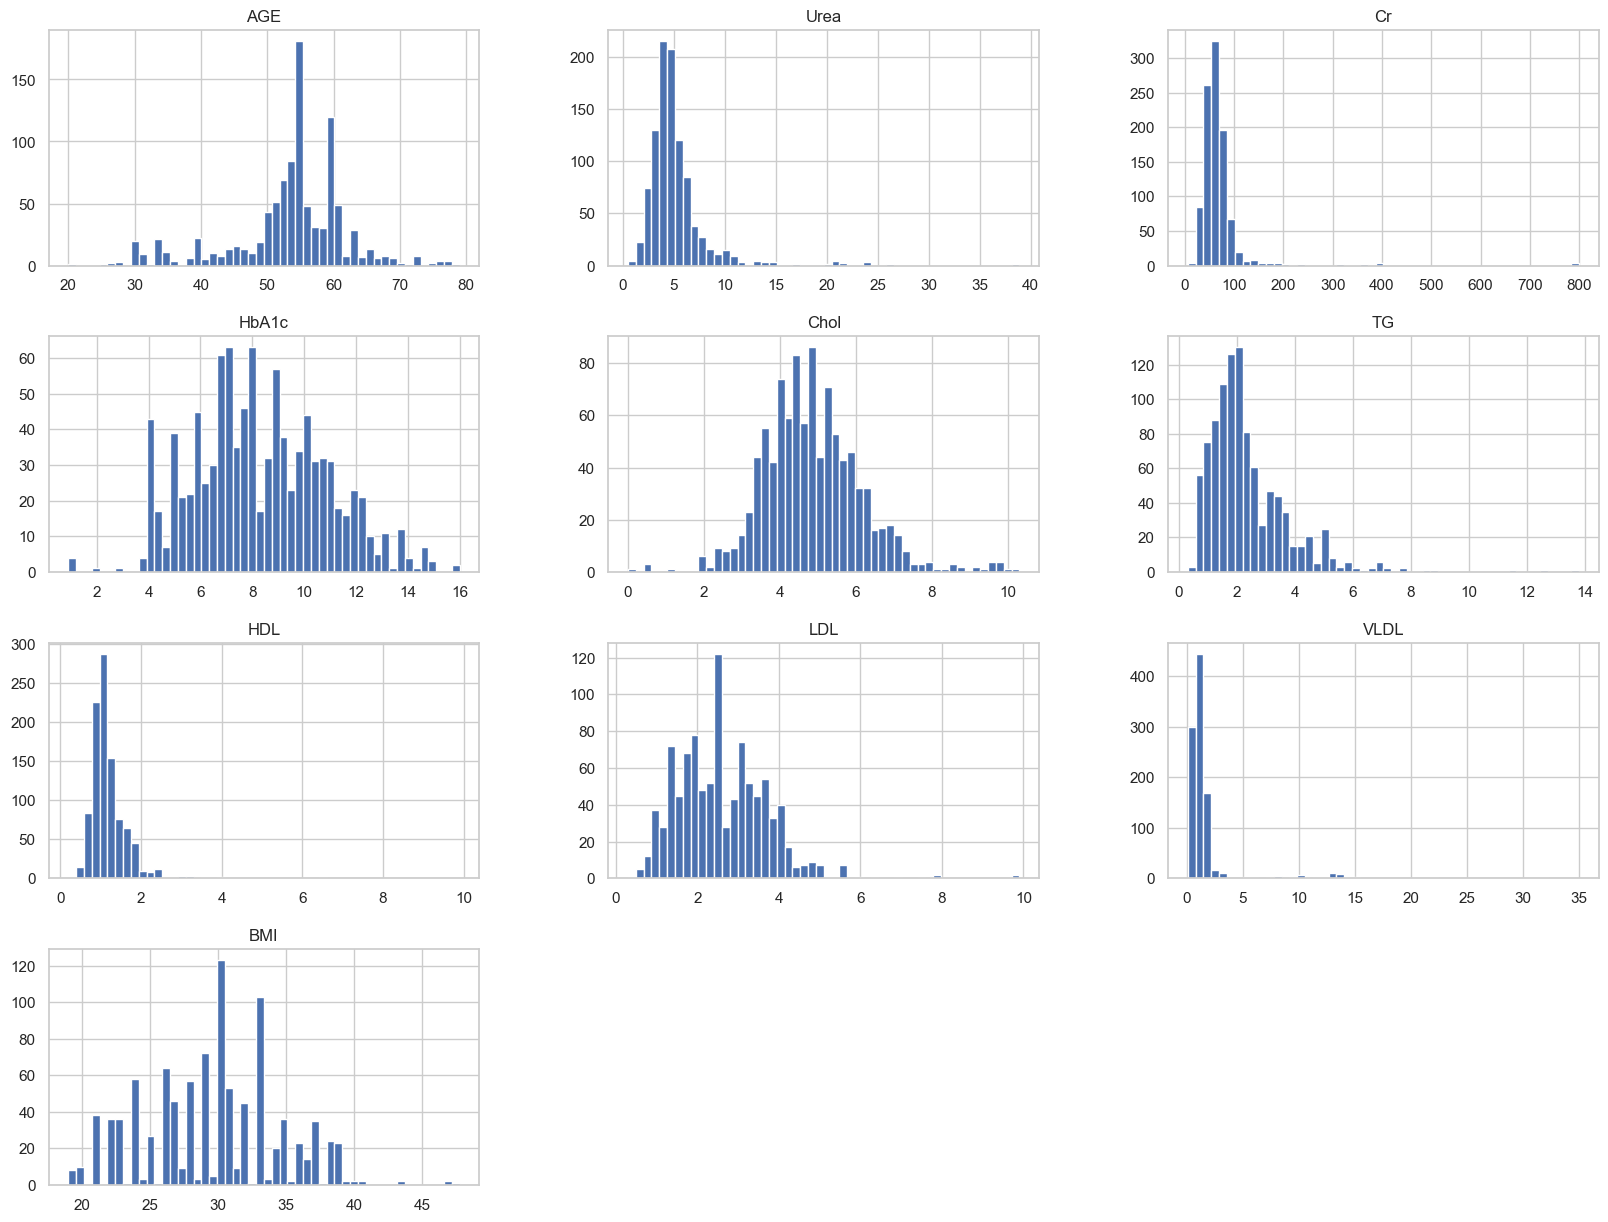

In [63]:
# histograma para os atributos numéricos
%matplotlib inline
import matplotlib.pyplot as plt

ldd.hist(bins=50, figsize=(20, 15))

plt.show()

Observações apontadas:
- `Urea`, `Cr`, `VLDL`, e `TG`, apresentam distribuições assimétricas, com caudas longas ou concentração próxima de zero;
- `Cr`, `Urea`, e `VLDL` mostram valores extremos que podem ser outliers;
- Algumas variáveis, como `HDL`, `TG`, `VLDL`, e `Cr`, apresentam enviesamento (skewness);
- As variáveis estão em escalas muito diferentes.

In [64]:
# codificando GENDER e CLASS
ldd['Gender'] = ldd['Gender'].map({'Male': 1, 'Female': 0})
ldd['CLASS'] = ldd['CLASS'].map({'Y': 0, 'N': 2, 'P': 1})

### Criando um conjunto de testes

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ldd, ldd['CLASS']):
  strat_train_set = ldd.loc[train_index]
  strat_test_set = ldd.loc[test_index]

In [66]:
strat_test_set['CLASS'].value_counts() / len(strat_test_set)

CLASS
0    0.845
2    0.105
1    0.050
Name: count, dtype: float64

In [67]:
ldd['CLASS'].value_counts() / len(ldd)

CLASS
0    0.844
2    0.103
1    0.053
Name: count, dtype: float64

In [68]:
# salvar os conjuntos em arquivos CSV
strat_train_set.to_csv('../dataset/strat_train_set.csv', index=False)
strat_test_set.to_csv('../dataset/strat_test_set.csv', index=False)

### Explorando e visualizando dados

In [69]:
ldd = strat_train_set.copy()

In [70]:
import seaborn as sns
sns.set_theme(style='whitegrid')

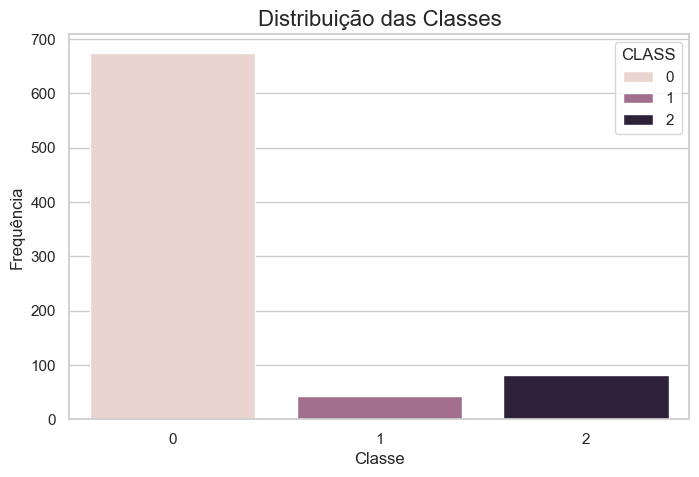

In [71]:
# Distribuição das classes
plt.figure(figsize=(8, 5))
sns.countplot(data=ldd, x='CLASS', hue='CLASS')
plt.title('Distribuição das Classes', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.show()

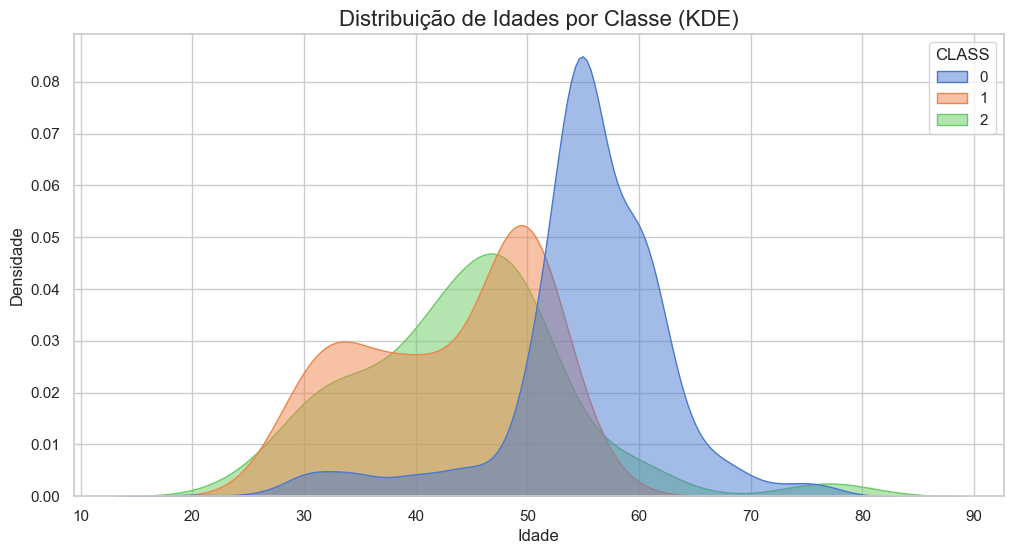

In [72]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=ldd, x="AGE", hue="CLASS", fill=True, alpha=0.5, palette="muted", common_norm=False)
plt.title("Distribuição de Idades por Classe (KDE)", fontsize=16)
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.show()

### Buscando correlações

In [73]:
corr_matrix = ldd.corr()

In [74]:
corr_matrix['CLASS'].sort_values(ascending=False)

CLASS     1.000000
HDL       0.003545
LDL      -0.005116
Cr       -0.027307
Urea     -0.053881
Gender   -0.079874
VLDL     -0.096631
TG       -0.173250
Chol     -0.177270
AGE      -0.444086
HbA1c    -0.552875
BMI      -0.570493
Name: CLASS, dtype: float64

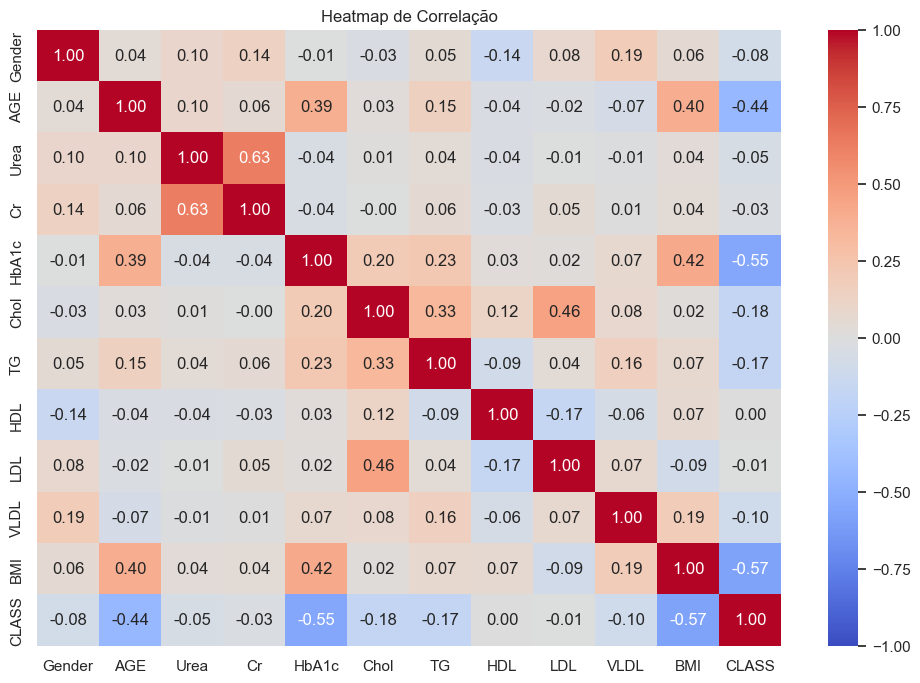

In [75]:
#plotar um heatmap das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap de Correlação")
plt.show()

As variáveis mais relevantes para prever CLASS são BMI, HbA1c e AGE, pois têm as correlações mais altas

### Experimentando combinação de atributos

In [76]:
# atributos relacionados ao perfil lipídico
# ldd['LDD_HDL_ratio'] = ldd['LDL'] / ldd['HDL']
# ldd['Chol_HDL_ratio'] = ldd['Chol'] / ldd['HDL']
# ldd['Atherosclerosis_index'] = (ldd['LDL'] + ldd['VLDL']) / ldd['HDL']

As combinações relacionadas ao perfil lipídico (`LDL_HDL_ratio`, `Chol_HDL_ratio`, `Atherosclerosis_index`) tiveram correlações fracas.

In [77]:
# indicadores metabólicos
ldd['Metabolic_index'] = (ldd['HbA1c'] * ldd['BMI']) / ldd['AGE']
ldd['Insulin_resistance_index'] = ldd['TG'] / ldd['HDL']

A variável `Metabolic_index` apresentou uma correlação relativamente alta. `Insulin_resistance_index` teve uma correlação maior do que TG.

In [78]:
# interação com gênero
ldd['Gender_BMI'] = ldd['Gender'] * ldd['BMI']
ldd['Gender_HbA1c'] = ldd['Gender'] * ldd['HbA1c']

`Gender_HbA1c` e `Gender_BMI` mostraram correlações maiores do que `Gender` sozinho.

In [79]:
corr_matrix = ldd.corr()
corr_matrix['CLASS'].sort_values(ascending=False)

CLASS                       1.000000
HDL                         0.003545
LDL                        -0.005116
Cr                         -0.027307
Urea                       -0.053881
Gender                     -0.079874
VLDL                       -0.096631
Insulin_resistance_index   -0.129503
Gender_BMI                 -0.167432
TG                         -0.173250
Chol                       -0.177270
Gender_HbA1c               -0.211175
AGE                        -0.444086
Metabolic_index            -0.478482
HbA1c                      -0.552875
BMI                        -0.570493
Name: CLASS, dtype: float64

### Peparando os dados para os algoritmos de ML

#### Identificação de Outliers

In [80]:
import numpy as np

# método iqr
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [81]:
for col in ['Urea', 'Cr', 'TG', 'VLDL']:
    ldd[f'{col}_outlier_iqr'] = detect_outliers_iqr(ldd[col])
    print(f"Outliers em {col}:")
    print("IQR:", ldd[f'{col}_outlier_iqr'].sum())

Outliers em Urea:
IQR: 54
Outliers em Cr:
IQR: 38
Outliers em TG:
IQR: 44
Outliers em VLDL:
IQR: 57


In [82]:
for col in ['Urea', 'Cr', 'TG', 'VLDL']:
    ldd = ldd[~ldd[f'{col}_outlier_iqr']]

In [83]:
for col in ['Urea', 'Cr', 'TG', 'VLDL']:
    ldd[f'{col}_log'] = np.log1p(ldd[col])

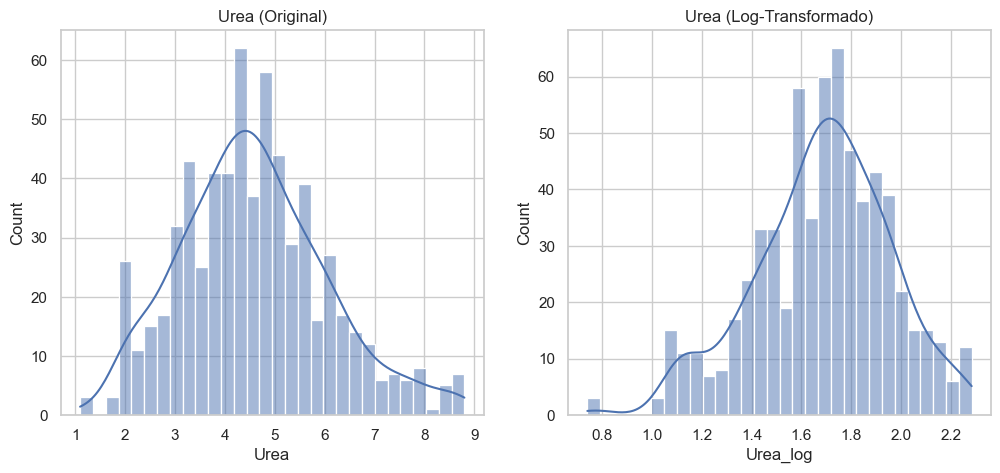

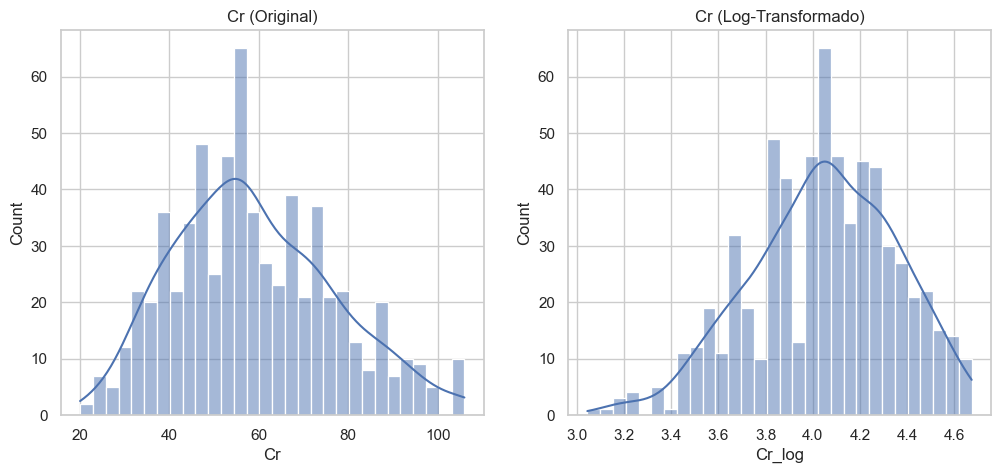

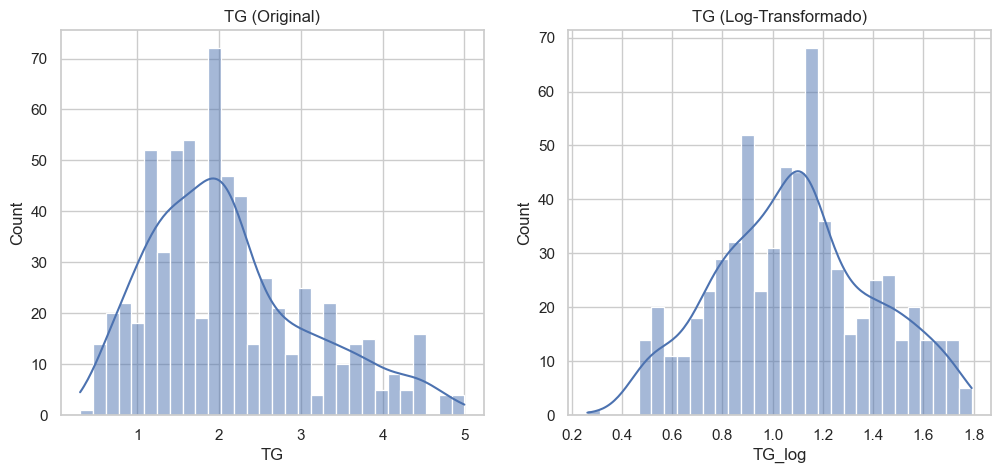

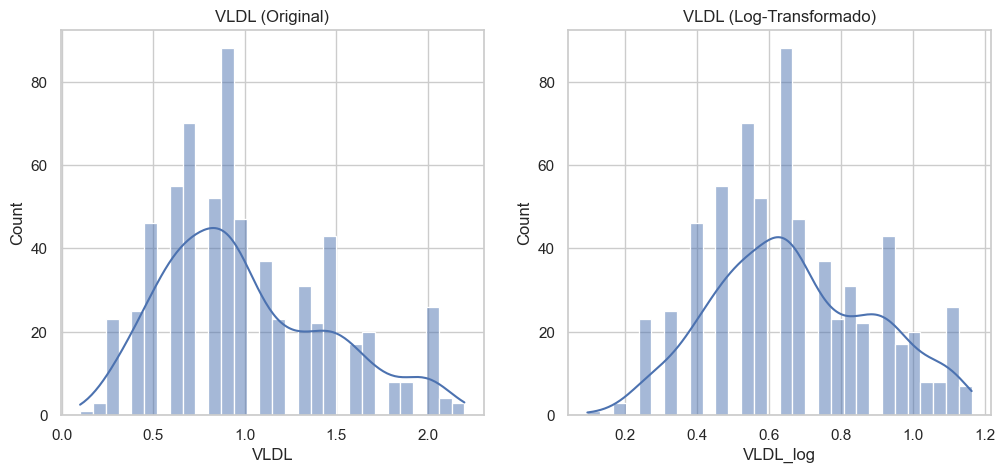

Imagem salva como ../images\VLDL_histograma.png


In [ ]:
for col in ['Urea', 'Cr', 'TG', 'VLDL']:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(ldd[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'{col} (Original)')
    sns.histplot(ldd[f'{col}_log'], bins=30, kde=True, ax=ax[1])
    ax[1].set_title(f'{col} (Log-Transformado)')
    plt.show()

In [85]:
from scipy.stats import skew

variables = ['Urea', 'Cr', 'TG', 'VLDL']

for col in variables:
    original_skew = skew(ldd[col], nan_policy='omit')
    transformed_skew = skew(ldd[f'{col}_log'], nan_policy='omit')
    print(f"{col}:")
    print(f"  Skewness Original: {original_skew:.2f}")
    print(f"  Skewness Transformado: {transformed_skew:.2f}\n")

Urea:
  Skewness Original: 0.42
  Skewness Transformado: -0.35

Cr:
  Skewness Original: 0.41
  Skewness Transformado: -0.31

TG:
  Skewness Original: 0.75
  Skewness Transformado: 0.10

VLDL:
  Skewness Original: 0.62
  Skewness Transformado: 0.19



In [86]:
ldd.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS', 'Metabolic_index', 'Insulin_resistance_index',
       'Gender_BMI', 'Gender_HbA1c', 'Urea_outlier_iqr', 'Cr_outlier_iqr',
       'TG_outlier_iqr', 'VLDL_outlier_iqr', 'Urea_log', 'Cr_log', 'TG_log',
       'VLDL_log'],
      dtype='object')

#### Balanceando os dados

In [87]:
X_train = strat_train_set.drop(columns=['CLASS'])
y_train = strat_train_set['CLASS']
X_test = strat_test_set.drop(columns=['CLASS'])
y_test = strat_test_set['CLASS']

In [88]:
from imblearn.over_sampling import SMOTE

# aplicando Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts())

CLASS
0    675
2    675
1    675
Name: count, dtype: int64


### Treinando Modelos

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

#### Treinando RF

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.9900
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200

Matriz de Confusão:
[[167   0   2]
 [  0  10   0]
 [  0   0  21]]


In [92]:
# ajustando hiperparâmetros com GridSearch
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [93]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [94]:
best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9900
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200



In [95]:
import joblib
joblib.dump(best_rf_model, '../models/random_forest_model.joblib')

['../models/random_forest_model.joblib']

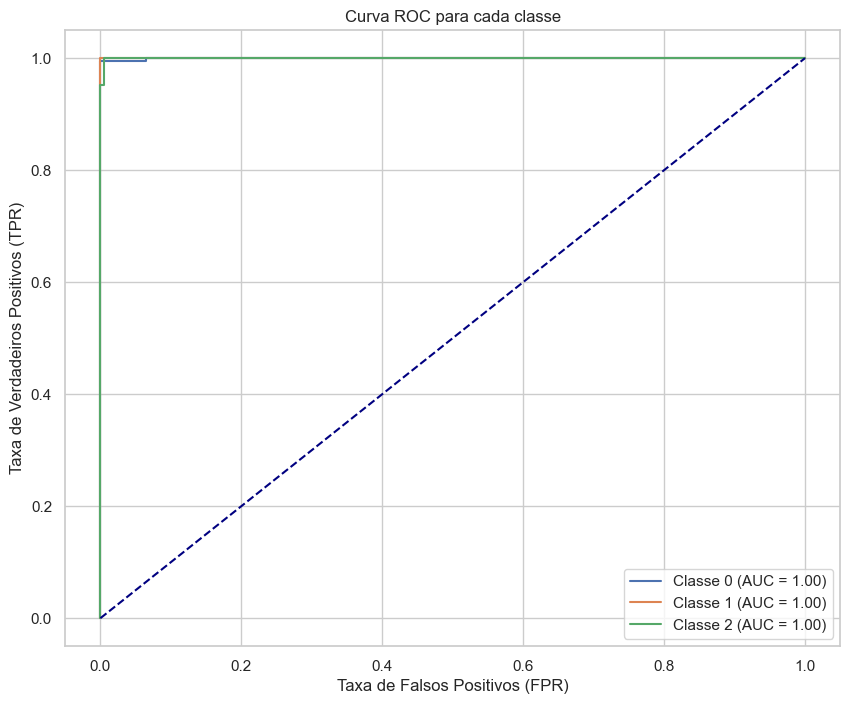

Imagem salva como ../images\curva_roc_rf.png


<Figure size 640x480 with 0 Axes>

In [96]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_rf_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))

for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.title('Curva ROC para cada classe')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

save_plot(plt.gcf(), 'curva_roc_rf.png')